<a href="https://colab.research.google.com/github/A01258386/Netflix-3modelStockPrediction/blob/main/Netflix3modelsprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Tesla stock pred for a specific day


In [ ]:
#import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# #Load the data
# from google.colab import files
# files.upload()

In [ ]:
#Store the data
df = pd.read_csv('FB.csv')
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-13,247.009995,250.149994,238.419998,239.000000,239.000000,24674900
1,2020-07-14,236.759995,240.330002,232.029999,239.729996,239.729996,23378100
2,2020-07-15,241.550003,244.820007,238.050003,240.279999,240.279999,19133600
3,2020-07-16,238.000000,241.759995,236.330002,240.929993,240.929993,18880700
4,2020-07-17,241.000000,244.160004,237.860001,242.029999,242.029999,18152400
...,...,...,...,...,...,...,...
246,2021-07-02,355.100006,356.440002,352.619995,354.700012,354.700012,11521300
247,2021-07-06,356.500000,358.790009,349.179993,352.779999,352.779999,13488500
248,2021-07-07,355.260010,356.489990,350.000000,350.489990,350.489990,14218900
249,2021-07-08,345.730011,348.329987,342.559998,345.649994,345.649994,14406500


In [ ]:
#Show and store the last row of data for testong prediction
actual_price = df.tail(1)
#Show the data 
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
250,2021-07-09,345.320007,350.709991,345.269989,350.420013,350.420013,13010400


In [ ]:
#Get all of the data except the last row
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-13,247.009995,250.149994,238.419998,239.000000,239.000000,24674900
1,2020-07-14,236.759995,240.330002,232.029999,239.729996,239.729996,23378100
2,2020-07-15,241.550003,244.820007,238.050003,240.279999,240.279999,19133600
3,2020-07-16,238.000000,241.759995,236.330002,240.929993,240.929993,18880700
4,2020-07-17,241.000000,244.160004,237.860001,242.029999,242.029999,18152400
...,...,...,...,...,...,...,...
245,2021-07-01,346.820007,354.670013,346.500000,354.390015,354.390015,17137000
246,2021-07-02,355.100006,356.440002,352.619995,354.700012,354.700012,11521300
247,2021-07-06,356.500000,358.790009,349.179993,352.779999,352.779999,13488500
248,2021-07-07,355.260010,356.489990,350.000000,350.489990,350.489990,14218900


In [ ]:
#Create empty lists
days = list()
adj_close_prices = list()

In [ ]:
#Get only the dates and the adjusted close prices
df_days =df.loc [:,'Date'] # all rows from Date column
df_adj_close = df.loc[:,'Adj Close'] #all rows from Adj Close column

In [ ]:
#Create the independent data set (dates)
for day in df_days:
  days.append([int(day.split('-')[2])])

#Create the dependent data set (adj close prices)
for adj_close_price in df_adj_close:
  adj_close_prices.append(float(adj_close_price))

In [ ]:
#show  the days

days

In [ ]:
# Show the adj close prices
len(adj_close_prices)

250

In [ ]:
#Create 3 models
lin_svr =SVR(kernel= 'linear', C =1000.0)
lin_svr.fit(days, adj_close_prices)

poly_svr =SVR(kernel= 'poly', C =1000.0, degree =2)
poly_svr.fit(days,adj_close_prices)

rbf_svr =SVR(kernel= 'rbf', C =1000.0,gamma = 0.85)
rbf_svr.fit(days,adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.85,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

<function matplotlib.pyplot.show>

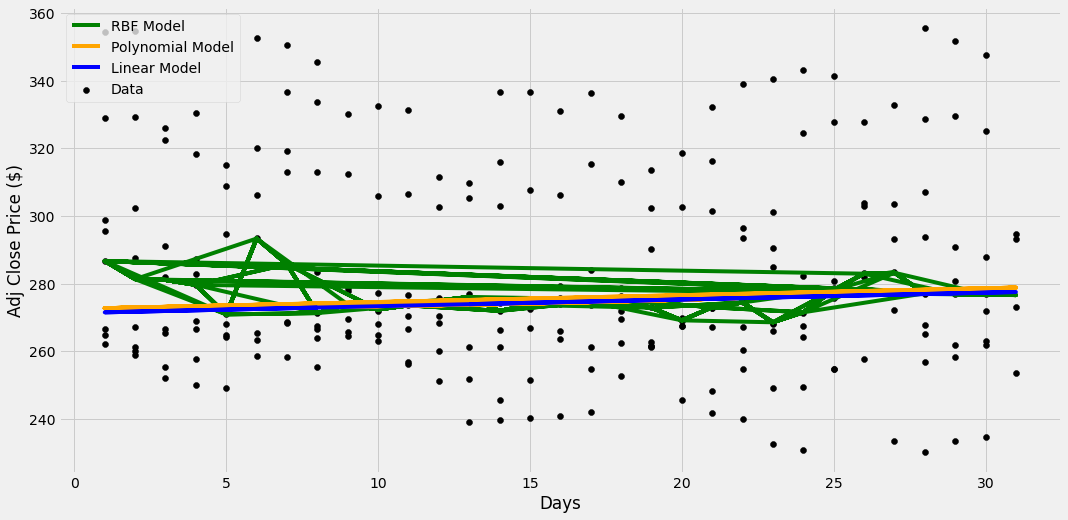

In [ ]:
#Plot the models
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color ='black',label ='Data')
plt.plot(days, rbf_svr.predict(days),color ='green',label= 'RBF Model')
plt.plot(days, poly_svr.predict(days),color ='orange',label= 'Polynomial Model')
plt.plot(days, lin_svr.predict(days),color ='blue',label= 'Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price ($)')
plt.legend()
plt.show

In [ ]:
#Show the predicted price for the given day
day=[[30]]
print('The RBF SVR predidicted price', rbf_svr.predict(day))
print('The Linear SVR predidicted price', lin_svr.predict(day))
print('The Polynomial SVR predidicted price', poly_svr.predict(day))

The RBF SVR predidicted price [276.87007178]
The Linear SVR predidicted price [277.30142829]
The Polynomial SVR predidicted price [278.39926722]


In [ ]:

print('The actual price:', adj_close_prices[30])

The actual price: 271.390015
